In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive/EECS 442 final project/v-coco"
# %cd "/content/drive/MyDrive/Colab Notebooks/EECS 442 final project/v-coco"

/content/drive/MyDrive/EECS 442 final project/v-coco


In [5]:
import __init__
import vsrl_utils as vu
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

added /content/drive/MyDrive/EECS 442 final project/v-coco/coco/PythonAPI to pythonpath


In [6]:
def draw_bbox(plt, ax, rois, fill=False, linewidth=2, edgecolor=[1.0, 0.0, 0.0], **kwargs):
    print(rois)
    for i in range(rois.shape[0]):
        roi = rois[i,:].astype(int)

        ax.add_patch(plt.Rectangle((roi[0], roi[1]),
            roi[2] - roi[0], roi[3] - roi[1],
            fill=False, linewidth=linewidth, edgecolor=edgecolor, **kwargs))

def subplot(plt, Y, X, sz_y = 10, sz_x = 10):
    plt.rcParams['figure.figsize'] = (X*sz_x, Y*sz_y)
    fig, axes = plt.subplots(Y, X)
    return fig, axes

In [7]:
# Load COCO annotations for V-COCO images
coco = vu.load_coco()

# Load the VCOCO annotations for vcoco_train image set
vcoco_all = vu.load_vcoco('vcoco_train')
for x in vcoco_all:
    x = vu.attach_gt_boxes(x, coco)

loading annotations into memory...
Done (t=3.34s)
creating index...
index created!
<class 'list'>
[183192, 183193, 183205, 183272, 183314, 183520, 183604, 183621, 183633, 183682, 183707, 183733, 183921, 184108, 184126, 184247, 184551, 184556, 184597, 184715, 184786, 184921, 184931, 184952, 185259, 185429, 185491, 185563, 185633, 185821, 185851, 185915, 185953, 186028, 186104, 186145, 186165, 186167, 186327, 186348, 186654, 186685, 186776, 186813, 186906, 187072, 187339, 187516, 187520, 187574, 187640, 187657, 187714, 187930, 187940, 187945, 188019, 188034, 188110, 188180, 188191, 188263, 188292, 188293, 188317, 188323, 188437, 188476, 188550, 188655, 188723, 188746, 188754, 188871, 188873, 188978, 189050, 189077, 189177, 189256, 189259, 189279, 189317, 189440, 189533, 189658, 189792, 189806, 189832, 189965, 190044, 190150, 190167, 190206, 190208, 190220, 190243, 190261, 190343, 190387, 190397, 190452, 190488, 190494, 190547, 190554, 190558, 190586, 190590, 190602, 190714, 190890, 19105

In [11]:
vcoco_all[1]

{'image_id': array([[226162],
        [210751],
        [433398],
        ...,
        [314204],
        [234642],
        [419349]]),
 'ann_id': array([[ 183192],
        [ 183193],
        [ 183205],
        ...,
        [2207726],
        [2207790],
        [2207940]]),
 'role_object_id': array([[ 183192],
        [ 183193],
        [ 183205],
        ...,
        [2207726],
        [2207790],
        [2207940]]),
 'label': array([[1],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]]),
 'action_name': 'stand',
 'role_name': ['agent'],
 'include': [[]],
 'bbox': array([[154.49,  71.25, 312.81, 395.57],
        [272.8 , 102.62, 489.02, 371.2 ],
        [291.24,  85.03, 639.64, 471.19],
        ...,
        [  3.16,   3.16, 339.75, 640.  ],
        [240.98, 131.59, 355.13, 304.92],
        [205.99, 167.01, 274.09, 398.81]]),
 'role_bbox': array([[154.49,  71.25, 312.81, 395.57],
        [272.8 , 102.62, 489.02, 371.2 ],
        [291.24,  85.03, 639.64, 471.

In [12]:
for i in range(len(vcoco_all)):
  print(vcoco_all[i]['action_name'])

hold
stand
sit
ride
walk
look
hit
eat
jump
lay
talk_on_phone
carry
throw
catch
cut
run
work_on_computer
ski
surf
skateboard
smile
drink
kick
point
read
snowboard


In [13]:
print(x.keys())
x['image_id'][0][0]
# x['meta_data_name'][id]
x['bbox'][0]

dict_keys(['image_id', 'ann_id', 'role_object_id', 'label', 'action_name', 'role_name', 'include', 'bbox', 'role_bbox'])


array([154.49,  71.25, 312.81, 395.57])

In [14]:
# Action classes and roles in V-COCO
classes = [x['action_name'] for x in vcoco_all]
for i, x in enumerate(vcoco_all):
    print ('{:>20s}'.format(x['action_name']), x['role_name'])

                hold ['agent', 'obj']
               stand ['agent']
                 sit ['agent', 'instr']
                ride ['agent', 'instr']
                walk ['agent']
                look ['agent', 'obj']
                 hit ['agent', 'instr', 'obj']
                 eat ['agent', 'obj', 'instr']
                jump ['agent', 'instr']
                 lay ['agent', 'instr']
       talk_on_phone ['agent', 'instr']
               carry ['agent', 'obj']
               throw ['agent', 'obj']
               catch ['agent', 'obj']
                 cut ['agent', 'instr', 'obj']
                 run ['agent']
    work_on_computer ['agent', 'instr']
                 ski ['agent', 'instr']
                surf ['agent', 'instr']
          skateboard ['agent', 'instr']
               smile ['agent']
               drink ['agent', 'instr']
                kick ['agent', 'obj']
               point ['agent', 'instr']
                read ['agent', 'obj']
           snowboard ['agent'

In [15]:
# Visualize annotations for the some class
cls_id = classes.index('hit')
vcoco = vcoco_all[cls_id]

{'license': 6, 'file_name': 'COCO_train2014_000000554541.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000554541.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-21 03:00:26', 'flickr_url': 'http://farm8.staticflickr.com/7258/7839144036_d0e55d9b5f_z.jpg', 'id': 554541}
bbox: [[157.48 114.34 335.46 480.  ]]
[[157.48 114.34 335.46 480.  ]]
{'license': 2, 'file_name': 'COCO_train2014_000000123038.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000123038.jpg', 'height': 320, 'width': 640, 'date_captured': '2013-11-21 04:38:12', 'flickr_url': 'http://farm6.staticflickr.com/5229/5567406074_8522e61a0a_z.jpg', 'id': 123038}
bbox: [[ 66.88  20.13 235.87 296.99]]
[[ 66.88  20.13 235.87 296.99]]
{'license': 6, 'file_name': 'COCO_train2014_000000542799.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000542799.jpg', 'height': 640, 'width': 445, 'date_captured': '2013-11-21 02:10:16', 'flickr_url': '

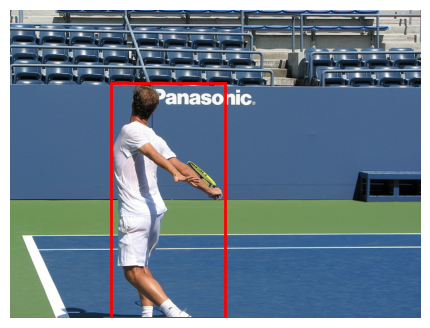

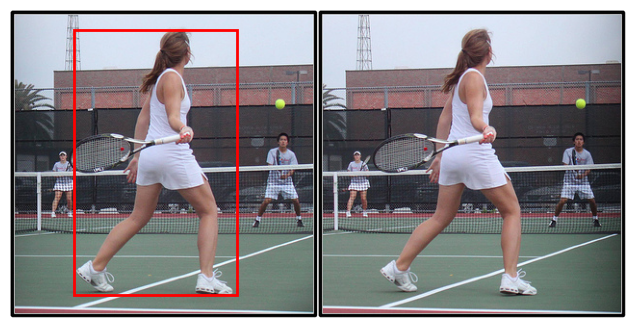

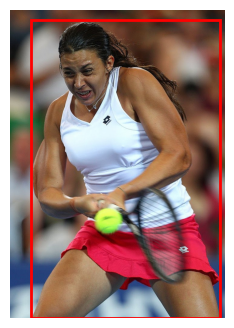

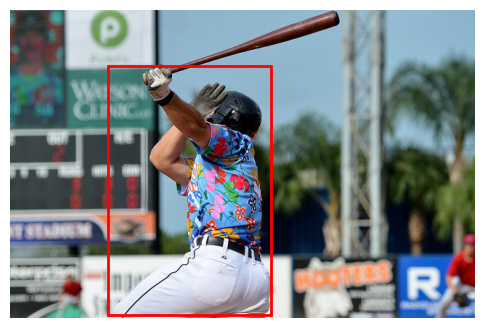

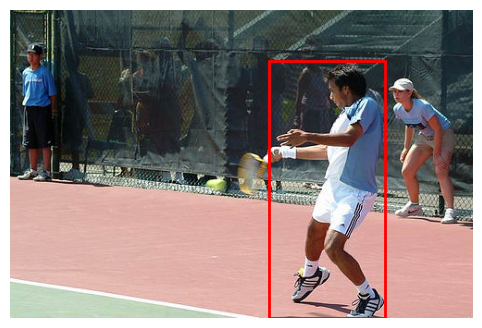

In [17]:
np.random.seed(1)
positive_index = np.where(vcoco['label'] == 1)[0]
positive_index = np.random.permutation(positive_index)

# the demo here laods images from the COCO website,
# you can alternatively use your own local folder of COCO images.
from PIL import Image

load_coco_image_from_web = True
if load_coco_image_from_web:
    base_coco_url = 'http://mscoco.org/images/' # no need
    import urllib #, cStringIO doesn't exits in python3
    import requests
    from io import StringIO

base_dir = '/content/drive/.shortcut-targets-by-id/1XyAaJw1NTr0gEbCy4LbYlmNWBxyehx4S/EECS 442 final project/v-coco/train2014/'

cc = plt.get_cmap('hsv', lut=4)

for i in range(5):
    id = positive_index[i]

    # load image
    coco_image = coco.loadImgs(ids=[vcoco['image_id'][id][0]])[0]
    print(coco_image)
    if load_coco_image_from_web:
        # coco_url = base_coco_url + str(coco_image['id'])
        # print(coco_url)
        # file = cStringIO.StringIO(urllib.urlopen(coco_url).read())
        '''
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        im = Image.open(requests.get(url, stream=True).raw)
        '''
        coco_url = coco_image['coco_url']
        file = Image.open(requests.get(coco_url, stream=True).raw)
        im = np.asarray(file)
    else:
      file = base_dir + coco_image['file_name']
      im = np.asarray(Image.open(file))

    sy = 4.; sx = float(im.shape[1])/float(im.shape[0])*sy;
    fig, ax = subplot(plt, 1,1, sy,sx); ax.set_axis_off();
    ax.imshow(im);

    # draw bounding box for agent
    print("bbox:", vcoco['bbox'][[id],:])
    draw_bbox(plt, ax, vcoco['bbox'][[id],:], edgecolor=cc(0)[:3])
    # draw_bbox(plt, ax, [[0, 0, 20, 20]], edgecolor=cc(0)[:3])
    role_bbox = vcoco['role_bbox'][id,:]*1.
    role_bbox = role_bbox.reshape((-1,4))
    # print(role_bbox)
    for j in range(1, len(vcoco['role_name'])):
        # if not np.isnan(role_bbox[j,0]):
        #     # print(role_bbox[[j],:])
        #     draw_bbox(plt, ax, role_bbox[[j],:], edgecolor=cc(j)[:3])
        if not np.isnan(role_bbox[1,0]):
            print(role_bbox[1,0], role_bbox[1,1])
            draw_bbox(plt, ax, role_bbox[[1],:], edgecolor=cc(j)[:3])

In [ ]:
coco_image = coco.loadImgs(ids=226162)[0]
print(coco_image)

{'license': 3, 'file_name': 'COCO_train2014_000000226162.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000226162.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-20 18:16:39', 'flickr_url': 'http://farm9.staticflickr.com/8058/8246571410_bf8c2b3604_z.jpg', 'id': 226162}


In [ ]:
base_dir = '/content/drive/EECS 442 final project/v-coco/train2014/'
file = base_dir + 'COCO_train2014_000000000260.jpg'
im = np.asarray(Image.open(file))
plt.imshow(im)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-69-54d9f7045a78>", line 3, in <cell line: 3>
    im = np.asarray(Image.open(file))
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3227, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/EECS 442 final project/v-coco/train2014/COCO_train2014_000000000260.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call l